# Aplicando PCA sobre RandomForest

En este JN, voy a aplicarle un PCA para saber si puedo mejorar mi modelo de alguna forma.

Al final, en la sección de Conclusiones, valoraré si finalmente le aplico a mi modelo PCA o no.

*Cada vez que aplico un PCA vuelvo a importar las librerías y a cargar el datasaset dado que si no lo hago me da error al calcular determinados scores o coeficientes.

Empiezo importando las librerías que voy a utilizar y cargando mi dataset.

In [198]:
%matplotlib inline

import numpy as np
import pandas as pd
import pandas.io

import matplotlib.pyplot as plt

import librosa.display
import librosa

from glob import glob

import ffmpeg

import os

from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsRestClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import linear_model
from sklearn.metrics import accuracy_score
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

from scipy import interp

from itertools import cycle

import seaborn as sns

import pickle

In [199]:
def readCsvToDataFrame(path):
    theDataFrame= pd.read_csv(path)
    theDataFrame = theDataFrame.drop(['Fourier33', 'Fourier34', 'Fourier35', 'Fourier36', 'Fourier37', 'Fourier38', 
                                      'Fourier39', 'Fourier40', 'Fourier41', 'Fourier42', 'Fourier43', 'Fourier44', 
                                      'Fourier45', 'Fourier46', 'Fourier47', 'Fourier48', 'Fourier49', 'Fourier50', 
                                      'Fourier51', 'Fourier52', 'Fourier53', 'Fourier54', 'Fourier55', 'Fourier56', 
                                      'Fourier57', 'Fourier58', 'Fourier59', 'Fourier60', 'Fourier61', 'Fourier62', 
                                      'Fourier63', 'Fourier64'], axis=1)
    return theDataFrame

data = readCsvToDataFrame('data_fourier_64.csv')

# PCA - 30

Empiezo probando a reducir el número de features de mi modelo a 30, para obtener las diferentes métricas que he obtenido antes, y ver si mejoran sustancialmente mis resultados.

Empiezo escalando las diferentes features que tengo para podemos aplicarle el PCA.

In [200]:
features = ['mfcc', 'scem','scom', 'srom','sbwm', 'tempo', 'rmse', 
            'Fourier1', 'Fourier2', 'Fourier3', 'Fourier4', 'Fourier5', 
            'Fourier6', 'Fourier7', 'Fourier8', 'Fourier9', 'Fourier10',
            'Fourier11', 'Fourier12', 'Fourier13', 'Fourier14', 'Fourier15',
            'Fourier16', 'Fourier17', 'Fourier18', 'Fourier19', 'Fourier20',
            'Fourier21', 'Fourier22', 'Fourier23', 'Fourier24', 'Fourier25',
            'Fourier26', 'Fourier27', 'Fourier28', 'Fourier29', 'Fourier30',
            'Fourier31', 'Fourier32']

x = data.loc[:, features].values
y = data.loc[:,['momento']].values

x = StandardScaler().fit_transform(x)

A continuación le aplico el PCA, reduciendo las features de 39 a 30, y muestro el dataset resultante.

In [201]:
pca = PCA(n_components=30)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents, 
                           columns = ['principal component 1',
                                      'principal component 2',
                                      'principal component 3',
                                      'principal component 4',
                                      'principal component 5',
                                      'principal component 6',
                                      'principal component 7',
                                      'principal component 8',
                                      'principal component 9',
                                      'principal component 10',
                                      'principal component 11',
                                      'principal component 12',
                                      'principal component 13',
                                      'principal component 14',
                                      'principal component 15',
                                      'principal component 16',
                                      'principal component 17',
                                      'principal component 18',
                                      'principal component 19',
                                      'principal component 20',
                                      'principal component 21',
                                      'principal component 22',
                                      'principal component 23',
                                      'principal component 24',
                                      'principal component 25',
                                      'principal component 26',
                                      'principal component 27',
                                      'principal component 28',
                                      'principal component 29',
                                      'principal component 30'])

principalDf.head()

,principal component 1,principal component 2,principal component 3,principal component 4,principal component 5,principal component 6,principal component 7,principal component 8,principal component 9,principal component 10,...,principal component 21,principal component 22,principal component 23,principal component 24,principal component 25,principal component 26,principal component 27,principal component 28,principal component 29,principal component 30
0,-3.142310,-0.751711,-1.004557,-1.192369,-0.371554,1.700616,-0.231551,-0.082984,0.568795,0.755270,...,0.233579,0.159167,0.052860,-0.303006,0.082919,-0.305417,-0.068626,0.101454,0.277064,0.039689
1,-0.767640,1.543038,-0.094543,-0.326692,0.487144,0.375097,0.392842,-0.874813,-0.307827,-1.298860,...,0.552351,-0.437073,1.002474,-0.395358,0.359552,-0.030645,-0.042675,-0.359713,-0.239207,-0.032471
2,-0.341087,-3.507851,1.734422,0.300554,-1.704769,-1.091617,-0.493518,-1.484578,0.743777,-0.155592,...,0.793218,0.175496,-0.132498,0.542173,0.199804,0.019183,-0.079916,-0.117798,-0.300582,-0.051707
3,5.626619,1.379330,-0.962858,0.822511,0.790111,0.114449,-0.787659,0.779516,0.347571,-2.111587,...,0.236327,-0.675246,-0.270102,-1.516540,0.865848,-0.548757,-0.727128,-0.691947,-0.861277,-1.979377
4,-0.558671,-2.629403,1.195346,0.332215,-0.854683,-0.553530,0.428748,0.522123,-0.041579,0.518637,...,0.033479,-0.217223,0.152854,-0.429350,0.083410,0.343862,-0.666622,0.243725,0.107874,-0.489661


Y ahora, para poder trabajar y concatenar la X y la y de forma correcta y que no me de errores, reseteo los índices de ambos dataframes.

In [202]:
principalDf.reset_index(drop=True, inplace=True)

aux = data[['momento']]
aux.reset_index(drop=True, inplace=True)

finalDf = pd.concat([principalDf, aux], axis = 1)
finalDf.head()

,principal component 1,principal component 2,principal component 3,principal component 4,principal component 5,principal component 6,principal component 7,principal component 8,principal component 9,principal component 10,...,principal component 22,principal component 23,principal component 24,principal component 25,principal component 26,principal component 27,principal component 28,principal component 29,principal component 30,momento
0,-3.142310,-0.751711,-1.004557,-1.192369,-0.371554,1.700616,-0.231551,-0.082984,0.568795,0.755270,...,0.159167,0.052860,-0.303006,0.082919,-0.305417,-0.068626,0.101454,0.277064,0.039689,Timbre
1,-0.767640,1.543038,-0.094543,-0.326692,0.487144,0.375097,0.392842,-0.874813,-0.307827,-1.298860,...,-0.437073,1.002474,-0.395358,0.359552,-0.030645,-0.042675,-0.359713,-0.239207,-0.032471,Cena
2,-0.341087,-3.507851,1.734422,0.300554,-1.704769,-1.091617,-0.493518,-1.484578,0.743777,-0.155592,...,0.175496,-0.132498,0.542173,0.199804,0.019183,-0.079916,-0.117798,-0.300582,-0.051707,Lavadora
3,5.626619,1.379330,-0.962858,0.822511,0.790111,0.114449,-0.787659,0.779516,0.347571,-2.111587,...,-0.675246,-0.270102,-1.516540,0.865848,-0.548757,-0.727128,-0.691947,-0.861277,-1.979377,Secador_pelo
4,-0.558671,-2.629403,1.195346,0.332215,-0.854683,-0.553530,0.428748,0.522123,-0.041579,0.518637,...,-0.217223,0.152854,-0.429350,0.083410,0.343862,-0.666622,0.243725,0.107874,-0.489661,Aire_acondicionado


Debido a la reducción de features al aplicar el CA, parte de la totalidad de la variación explicada del modelo original se pierde, por lo que voy a ver cómo se distribuye esta variación entre las 30 features, cuánta variación se explica y cuánta se ha perdido.

In [203]:
print('La variación explicada por cada feature ha sido de {} respectivamente.'.format(pca.explained_variance_ratio_))
print('La variación explicada total de este modelo con respecto al original ha sido del {:.2f}%.'.format(np.sum(pca.explained_variance_ratio_)*100))
print('La variación perdida con respecto al modelo original ha sido del {:.2f}%.'.format(100 - np.sum(pca.explained_variance_ratio_)*100))

La variación explicada por cada feature ha sido de [0.36004416 0.13829704 0.06264159 0.04445057 0.03894884 0.02974796
 0.02658933 0.02402241 0.02353214 0.01840268 0.01785129 0.01739536
 0.01537002 0.01355559 0.01158758 0.01116589 0.01078355 0.00995221
 0.00946495 0.00897036 0.00837242 0.00789553 0.00781239 0.00735319
 0.00706813 0.00691941 0.00675316 0.00654961 0.00625911 0.00611822] respectivamente.
La variación explicada total de este modelo con respecto al original ha sido del 96.39%.
La variación perdida con respecto al modelo original ha sido del 3.61%.


Como se puede observar debajo, la correlación entre las diferentes features prácticamente ha desaparecido.

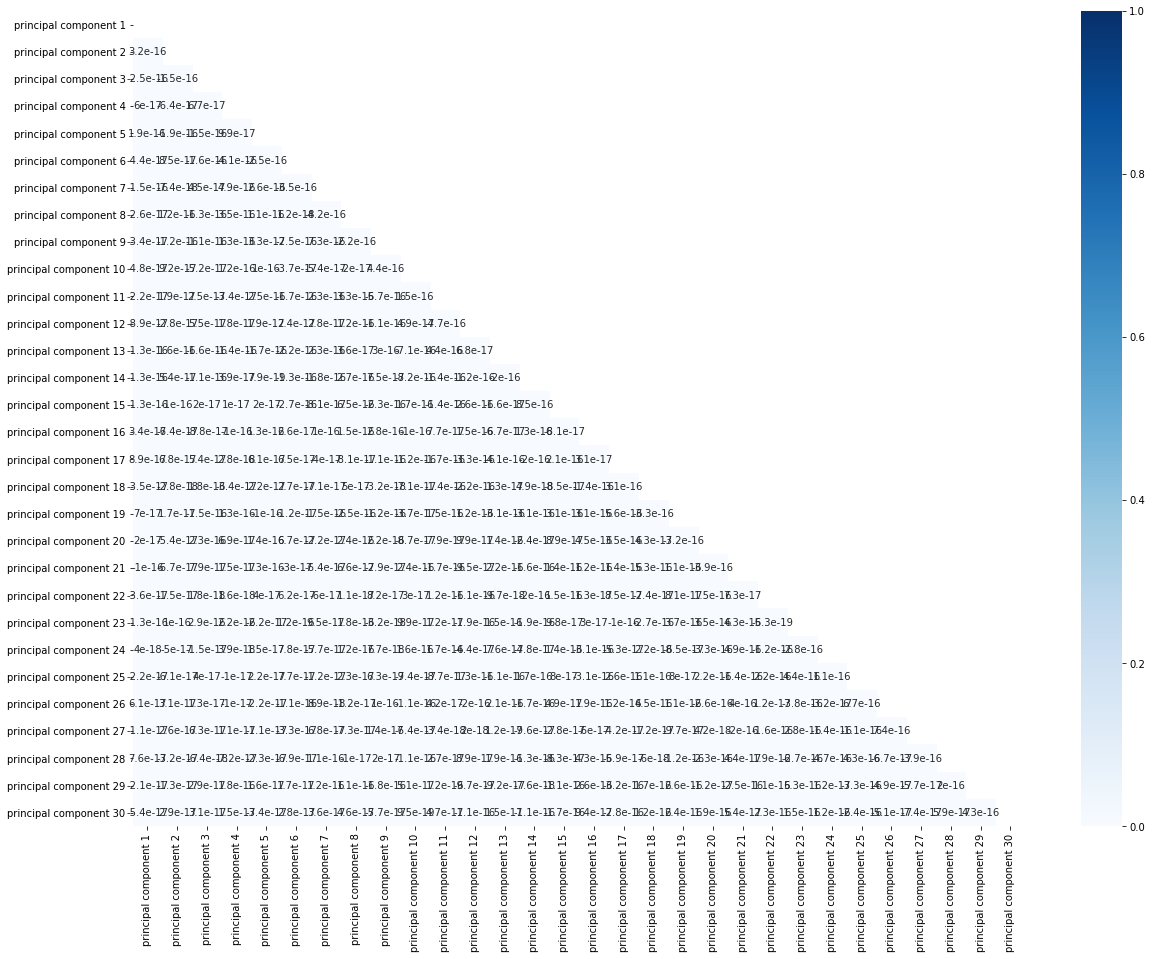

In [204]:
def get_matrix(dataset, classes):
    mask = np.zeros_like(dataset.corr(), dtype=np.bool)
    mask[np.triu_indices_from(mask)] = True
    fig, ax = plt.subplots(figsize=(20,15))
    ax = sns.heatmap(dataset.corr(), mask=mask, annot=True, cmap="Blues")

#     sns.set(style="ticks")
#     sns.pairplot(dataset, hue=classes)
    
get_matrix(finalDf, 'momento')

Y termino con el mismo análisis que hice con el modelo original.

Es por ello que noy voy a entrar a dar epxlicaciones ni para este modelo ni para el resto de PCA, dado que las voy a dar todas juntas en la sección final de Conclusiones de este JN.

In [205]:
y = pd.get_dummies(data=finalDf.momento)
X = data.loc[:, finalDf.columns != 'momento']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True)

In [206]:
clf1 = OneVsRestClassifier(RandomForestClassifier(n_estimators=60))
scores = cross_val_score(clf1, X, y, cv=10)
print(scores)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

[0.97486034 0.97276536 0.97835196 0.97765363 0.96438547 0.97765363
 0.96787709 0.9706499  0.96995108 0.9706499 ]
Accuracy: 0.97 (+/- 0.01)


In [208]:
clf1.fit(X_train, y_train)
clf1.score(X_test, y_test)

0.9706703910614525

In [209]:
predictions = clf1.predict(X_test)
errors = abs(predictions - y_test)
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')

Mean Absolute Error: Afeitadora            0.00
Aire_acondicionado    0.00
Alarma                0.00
Aspiradora            0.01
Cena                  0.00
Ducha                 0.00
Grifo                 0.00
Lavadora              0.00
Licuadora             0.01
Microondas            0.00
Secador_pelo          0.00
Secadora              0.00
Silencio              0.00
Tecleo                0.00
Telefono              0.00
Timbre                0.00
dtype: float64 degrees.


In [210]:
cls = RandomForestClassifier(n_estimators=40, random_state=0)
cls.fit(X_train, y_train)
importances = cls.feature_importances_

In [211]:
std = np.std([tree.feature_importances_ for tree in cls.estimators_], axis=0)

In [212]:
indices = np.argsort(importances)[::-1]

In [213]:
print("Feature ranking:")

for f in range(X_train.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

display(pd.DataFrame(cls.feature_importances_, 
                     index = X_train.columns, 
                     columns = ['importance']).sort_values('importance', ascending=False))

Feature ranking:
1. feature 2 (0.147585)
2. feature 1 (0.121907)
3. feature 0 (0.119731)
4. feature 3 (0.104887)
5. feature 4 (0.104340)
6. feature 6 (0.101873)
7. feature 8 (0.025901)
8. feature 14 (0.021995)
9. feature 13 (0.020952)
10. feature 11 (0.019225)
11. feature 12 (0.017604)
12. feature 10 (0.017306)
13. feature 9 (0.017160)
14. feature 18 (0.016925)
15. feature 20 (0.013769)
16. feature 17 (0.011921)
17. feature 16 (0.010648)
18. feature 15 (0.010465)
19. feature 19 (0.010067)
20. feature 24 (0.009677)
21. feature 26 (0.009130)
22. feature 21 (0.008543)
23. feature 5 (0.008301)
24. feature 7 (0.008065)
25. feature 28 (0.007802)
26. feature 27 (0.007674)
27. feature 23 (0.007331)
28. feature 25 (0.006968)
29. feature 29 (0.006752)
30. feature 22 (0.005494)


,importance
scom,0.147585
scem,0.121907
mfcc,0.119731
srom,0.104887
sbwm,0.104340
rmse,0.101873
Fourier2,0.025901
Fourier8,0.021995
Fourier7,0.020952
Fourier5,0.019225


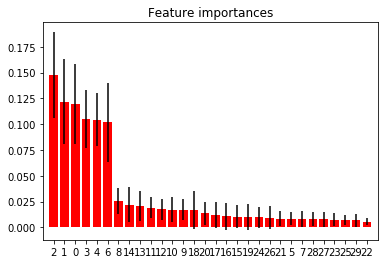

In [214]:
plt.figure()
plt.title("Feature importances")
plt.bar(range(X_train.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(X_train.shape[1]), indices)
plt.xlim([-1, X_train.shape[1]])
plt.show()

In [215]:
actual_values = y_test.values.argmax(axis=1)
predictions = clf1.predict(X_test).argmax(axis=1)

accuracy_score = accuracy_score(actual_values, predictions)
accuracy_score

0.9710195530726257

In [216]:
balanced_accuracy_score = balanced_accuracy_score(actual_values, predictions)
balanced_accuracy_score

0.9718628295531414

In [217]:
precision = pd.DataFrame(precision_score(actual_values, predictions,average=None))
recall = pd.DataFrame(recall_score(actual_values, predictions,average=None))
f1_score = pd.DataFrame(f1_score(actual_values, predictions, average=None))

precision_recall = pd.concat([precision, recall, f1_score], axis=1)
precision_recall.columns = ['precision', 'recall', 'f1_score']
precision_recall.index = ['Cena', 'Ducha', 'Lavadora', 'Aspiradora', 'Afeitadora', 'Secador_pelo', 
                          'Aire_acondicionado', 'Telefono', 'Tecleo', 'Silencio', 'Secadora', 'Timbre', 
                          'Licuadora', 'Alarma', 'Grifo', 'Microondas']
precision_recall.index.name = 'momento_aux'
precision_recall

,precision,recall,f1_score
momento_aux,,,
Cena,0.712177,1.000000,0.831897
Ducha,0.993789,1.000000,0.996885
Lavadora,1.000000,0.985149,0.992519
Aspiradora,0.993548,0.900585,0.944785
Afeitadora,1.000000,0.960630,0.979920
Secador_pelo,1.000000,0.959770,0.979472
Aire_acondicionado,1.000000,0.967568,0.983516
Telefono,1.000000,0.991701,0.995833
Tecleo,1.000000,0.882075,0.937343


Confusion matrix, without normalization
[[193   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0 160   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  2   0 199   0   0   0   0   0   0   0   0   0   0   0   1   0]
 [ 17   0   0 154   0   0   0   0   0   0   0   0   0   0   0   0]
 [  5   0   0   0 122   0   0   0   0   0   0   0   0   0   0   0]
 [  7   0   0   0   0 167   0   0   0   0   0   0   0   0   0   0]
 [  6   0   0   0   0   0 179   0   0   0   0   0   0   0   0   0]
 [  1   1   0   0   0   0   0 239   0   0   0   0   0   0   0   0]
 [ 22   0   0   1   0   0   0   0 187   2   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0 162   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0 183   0   0   0   0   0]
 [  2   0   0   0   0   0   0   0   0   0   0 178   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0 180   0   0   0]
 [  8   0   0   0   0   0   0   0   0   0   0   0   0 207   0   0]
 [  1   0   0   0   0 

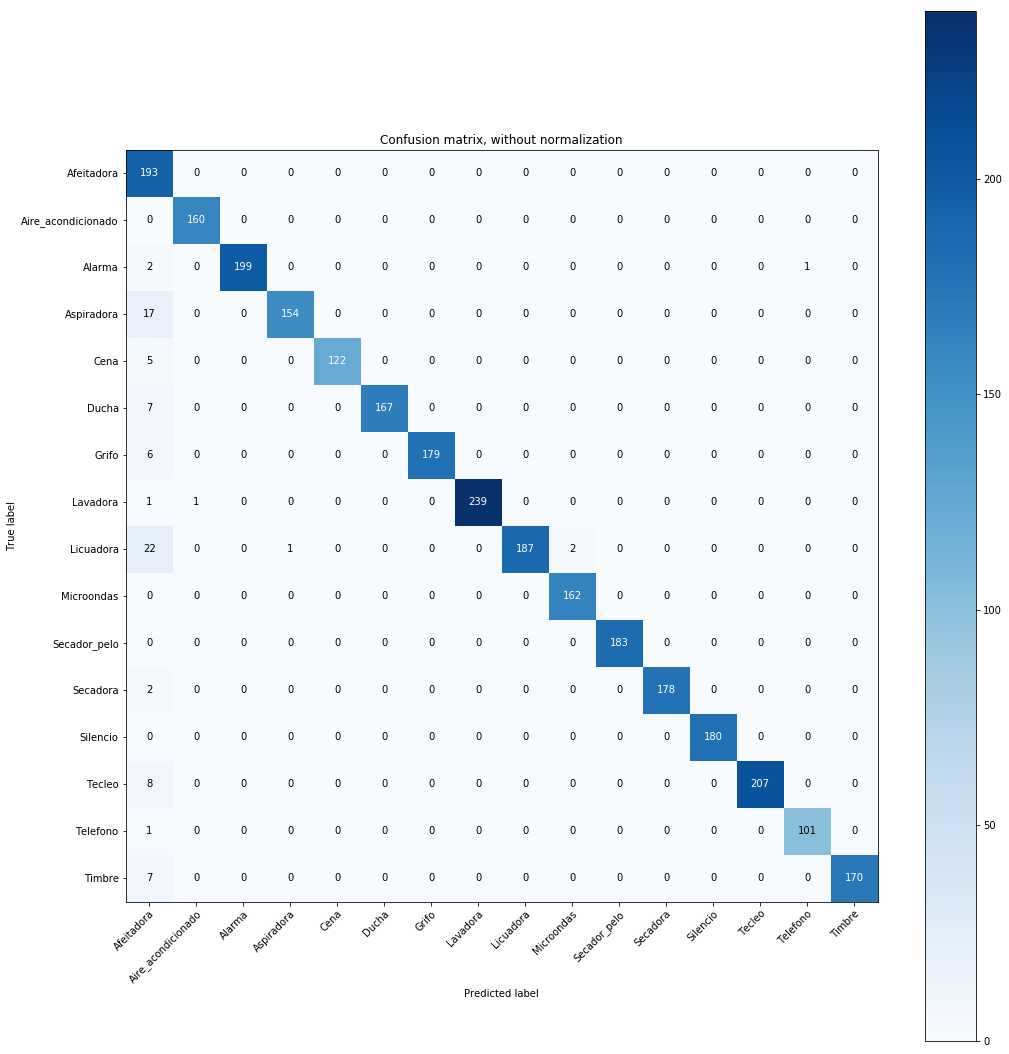

In [218]:
def plot_confusion_matrix(y_true, y_pred, classes, normalize=False, title=None, cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    classes = classes[unique_labels(y_true, y_pred)]
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    fig, ax = plt.subplots(figsize=(15,15))
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax

plot_confusion_matrix(actual_values, predictions, y.columns)

In [219]:
y = label_binarize(y, classes=['Cena', 'Ducha', 'Lavadora', 'Aspiradora', 'Afeitadora', 'Secador_pelo', 
                               'Aire_acondicionado', 'Telefono', 'Tecleo', 'Silencio', 'Secadora', 'Timbre', 
                               'Licuadora', 'Alarma', 'Grifo', 'Microondas'])
n_classes = y.shape[1]

In [220]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True)

In [221]:
classifier = OneVsRestClassifier(RandomForestClassifier(n_estimators=40))
y_score = classifier.fit(X_train, y_train).predict_proba(X_test)

In [222]:
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

In [223]:
fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

In [224]:
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

In [225]:
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += interp(all_fpr, fpr[i], tpr[i])

In [226]:
mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

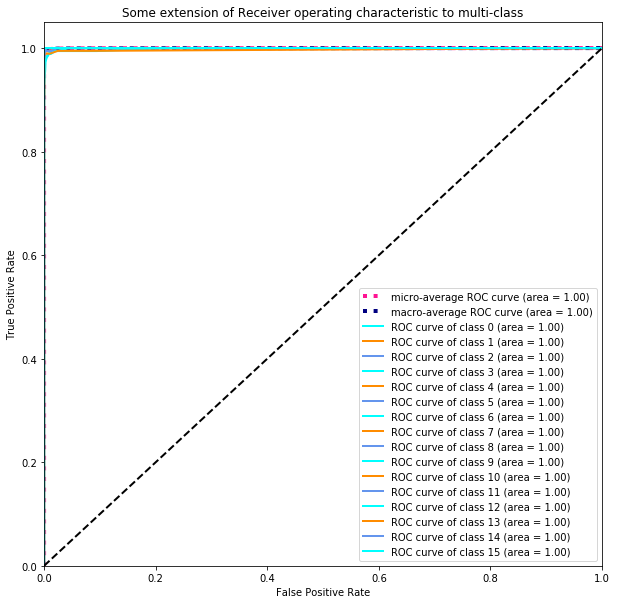

In [227]:
plt.figure(figsize=(10,10))
lw = 2
plt.plot(fpr["micro"], tpr["micro"],
         label='micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["micro"]),
         color='deeppink', linestyle=':', linewidth=4)

plt.plot(fpr["macro"], tpr["macro"],
         label='macro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["macro"]),
         color='navy', linestyle=':', linewidth=4)

colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Some extension of Receiver operating characteristic to multi-class')
plt.legend(loc="lower right")
plt.show()

# PCA - 20

In [228]:
%matplotlib inline

import numpy as np
import pandas as pd
import pandas.io

import matplotlib.pyplot as plt

import librosa.display
import librosa

from glob import glob

import ffmpeg

import os

from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsRestClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import linear_model
from sklearn.metrics import accuracy_score
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

from scipy import interp

from itertools import cycle

import seaborn as sns

import pickle

In [229]:
def readCsvToDataFrame(path):
    theDataFrame= pd.read_csv(path)
    theDataFrame = theDataFrame.drop(['Fourier33', 'Fourier34', 'Fourier35', 'Fourier36', 'Fourier37', 'Fourier38', 
                                      'Fourier39', 'Fourier40', 'Fourier41', 'Fourier42', 'Fourier43', 'Fourier44', 
                                      'Fourier45', 'Fourier46', 'Fourier47', 'Fourier48', 'Fourier49', 'Fourier50', 
                                      'Fourier51', 'Fourier52', 'Fourier53', 'Fourier54', 'Fourier55', 'Fourier56', 
                                      'Fourier57', 'Fourier58', 'Fourier59', 'Fourier60', 'Fourier61', 'Fourier62', 
                                      'Fourier63', 'Fourier64'], axis=1)
    return theDataFrame

data = readCsvToDataFrame('data_fourier_64.csv')

In [230]:
features = ['mfcc', 'scem','scom', 'srom','sbwm', 'tempo', 'rmse', 
            'Fourier1', 'Fourier2', 'Fourier3', 'Fourier4', 'Fourier5', 
            'Fourier6', 'Fourier7', 'Fourier8', 'Fourier9', 'Fourier10',
            'Fourier11', 'Fourier12', 'Fourier13', 'Fourier14', 'Fourier15',
            'Fourier16', 'Fourier17', 'Fourier18', 'Fourier19', 'Fourier20',
            'Fourier21', 'Fourier22', 'Fourier23', 'Fourier24', 'Fourier25',
            'Fourier26', 'Fourier27', 'Fourier28', 'Fourier29', 'Fourier30',
            'Fourier31', 'Fourier32']

x = data.loc[:, features].values
y = data.loc[:,['momento']].values

x = StandardScaler().fit_transform(x)

In [231]:
pca = PCA(n_components=20)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents, 
                           columns = ['principal component 1',
                                      'principal component 2',
                                      'principal component 3',
                                      'principal component 4',
                                      'principal component 5',
                                      'principal component 6',
                                      'principal component 7',
                                      'principal component 8',
                                      'principal component 9',
                                      'principal component 10',
                                      'principal component 11',
                                      'principal component 12',
                                      'principal component 13',
                                      'principal component 14',
                                      'principal component 15',
                                      'principal component 16',
                                      'principal component 17',
                                      'principal component 18',
                                      'principal component 19',
                                      'principal component 20'])

principalDf.head()

,principal component 1,principal component 2,principal component 3,principal component 4,principal component 5,principal component 6,principal component 7,principal component 8,principal component 9,principal component 10,principal component 11,principal component 12,principal component 13,principal component 14,principal component 15,principal component 16,principal component 17,principal component 18,principal component 19,principal component 20
0,-3.142310,-0.751712,-1.004559,-1.192432,-0.371604,1.700359,-0.231946,-0.083054,0.569193,0.754983,1.466689,0.166585,-0.876731,-0.201651,0.102137,0.282975,0.250576,-0.436516,0.421425,-0.444023
1,-0.767640,1.543039,-0.094564,-0.326844,0.487124,0.374846,0.392038,-0.875100,-0.307347,-1.300779,0.745333,0.072492,-0.412017,-0.610806,-0.140686,0.057009,0.291579,-0.641924,0.831348,-0.362119
2,-0.341087,-3.507851,1.734417,0.300473,-1.704839,-1.092124,-0.493881,-1.484702,0.744440,-0.154352,-0.746954,0.364148,0.522979,0.685498,-0.119603,-0.688596,1.415668,-1.224314,-1.311818,0.316910
3,5.626619,1.379332,-0.962890,0.822501,0.789803,0.114228,-0.789281,0.773192,0.351200,-2.106542,1.425989,-0.604577,2.012468,0.752390,-0.216491,-0.461037,-1.309622,-0.375672,-1.014917,-0.110226
4,-0.558671,-2.629404,1.195349,0.332113,-0.854860,-0.554133,0.428996,0.521608,-0.040023,0.522407,-0.342606,-0.871016,0.160884,-0.276407,-0.132843,-0.032477,0.003017,0.256906,0.827874,-0.565999


In [232]:
principalDf.reset_index(drop=True, inplace=True)

aux = data[['momento']]
aux.reset_index(drop=True, inplace=True)

finalDf = pd.concat([principalDf, aux], axis = 1)
finalDf.head()

,principal component 1,principal component 2,principal component 3,principal component 4,principal component 5,principal component 6,principal component 7,principal component 8,principal component 9,principal component 10,...,principal component 12,principal component 13,principal component 14,principal component 15,principal component 16,principal component 17,principal component 18,principal component 19,principal component 20,momento
0,-3.142310,-0.751712,-1.004559,-1.192432,-0.371604,1.700359,-0.231946,-0.083054,0.569193,0.754983,...,0.166585,-0.876731,-0.201651,0.102137,0.282975,0.250576,-0.436516,0.421425,-0.444023,Timbre
1,-0.767640,1.543039,-0.094564,-0.326844,0.487124,0.374846,0.392038,-0.875100,-0.307347,-1.300779,...,0.072492,-0.412017,-0.610806,-0.140686,0.057009,0.291579,-0.641924,0.831348,-0.362119,Cena
2,-0.341087,-3.507851,1.734417,0.300473,-1.704839,-1.092124,-0.493881,-1.484702,0.744440,-0.154352,...,0.364148,0.522979,0.685498,-0.119603,-0.688596,1.415668,-1.224314,-1.311818,0.316910,Lavadora
3,5.626619,1.379332,-0.962890,0.822501,0.789803,0.114228,-0.789281,0.773192,0.351200,-2.106542,...,-0.604577,2.012468,0.752390,-0.216491,-0.461037,-1.309622,-0.375672,-1.014917,-0.110226,Secador_pelo
4,-0.558671,-2.629404,1.195349,0.332113,-0.854860,-0.554133,0.428996,0.521608,-0.040023,0.522407,...,-0.871016,0.160884,-0.276407,-0.132843,-0.032477,0.003017,0.256906,0.827874,-0.565999,Aire_acondicionado


In [233]:
print('La variación explicada por cada feature ha sido de {} respectivamente.'.format(pca.explained_variance_ratio_))
print('La variación explicada total de este modelo con respecto al original ha sido del {:.2f}%.'.format(np.sum(pca.explained_variance_ratio_)*100))
print('La variación perdida con respecto al modelo original ha sido del {:.2f}%.'.format(100 - np.sum(pca.explained_variance_ratio_)*100))

La variación explicada por cada feature ha sido de [0.36004416 0.13829704 0.06264159 0.04445057 0.03894884 0.02974794
 0.02658931 0.02402237 0.0235321  0.01840247 0.01785115 0.01739524
 0.01536956 0.01355127 0.01157578 0.01115388 0.01077297 0.0099437
 0.00942714 0.00895038] respectivamente.
La variación explicada total de este modelo con respecto al original ha sido del 89.27%.
La variación perdida con respecto al modelo original ha sido del 10.73%.


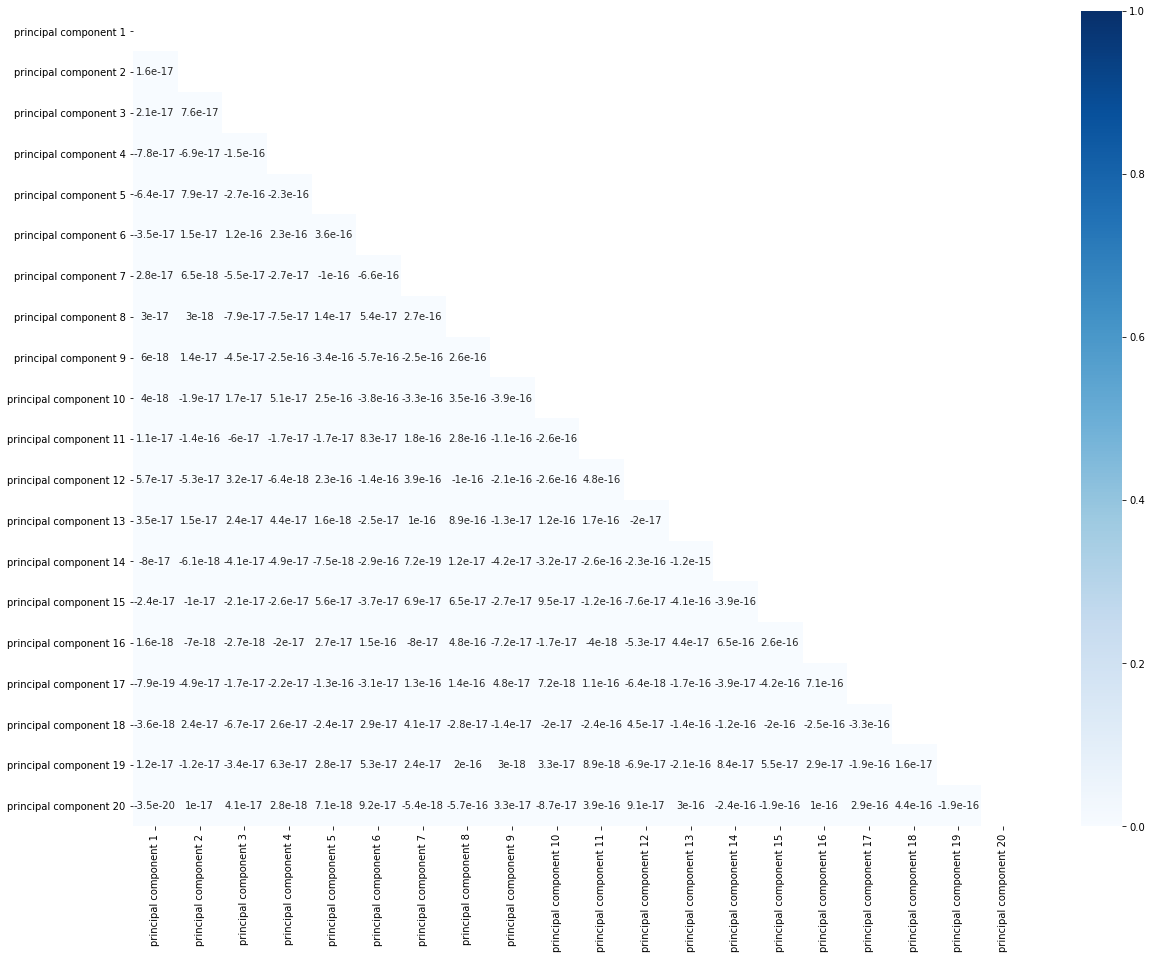

In [234]:
def get_matrix(dataset, classes):
    mask = np.zeros_like(dataset.corr(), dtype=np.bool)
    mask[np.triu_indices_from(mask)] = True
    fig, ax = plt.subplots(figsize=(20,15))
    ax = sns.heatmap(dataset.corr(), mask=mask, annot=True, cmap="Blues")

#     sns.set(style="ticks")
#     sns.pairplot(dataset, hue=classes)
    
get_matrix(finalDf, 'momento')

In [235]:
y = pd.get_dummies(data=finalDf.momento)
X = data.loc[:, finalDf.columns != 'momento']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True)

In [236]:
clf2 = OneVsRestClassifier(RandomForestClassifier(n_estimators=60))
scores = cross_val_score(clf2, X, y, cv=10)
print(scores)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

[0.9825419  0.97625698 0.98184358 0.98114525 0.97206704 0.98673184
 0.97765363 0.97414396 0.9769392  0.97414396]
Accuracy: 0.98 (+/- 0.01)


In [237]:
clf2.fit(X_train, y_train)
clf2.score(X_test, y_test)

0.9769553072625698

In [238]:
filename = 'finalized_model_fourier_64_PCA.sav'
pickle.dump(clf2, open(filename, 'wb'))

In [239]:
predictions = clf2.predict(X_test)
errors = abs(predictions - y_test)
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')

Mean Absolute Error: Afeitadora            0.00
Aire_acondicionado    0.00
Alarma                0.00
Aspiradora            0.00
Cena                  0.00
Ducha                 0.00
Grifo                 0.00
Lavadora              0.00
Licuadora             0.01
Microondas            0.00
Secador_pelo          0.00
Secadora              0.00
Silencio              0.00
Tecleo                0.00
Telefono              0.00
Timbre                0.00
dtype: float64 degrees.


In [240]:
cls = RandomForestClassifier(n_estimators=40, random_state=0)
cls.fit(X_train, y_train)
importances = cls.feature_importances_

In [241]:
std = np.std([tree.feature_importances_ for tree in cls.estimators_], axis=0)

In [242]:
indices = np.argsort(importances)[::-1]

In [243]:
print("Feature ranking:")

for f in range(X_train.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

display(pd.DataFrame(cls.feature_importances_, 
                     index = X_train.columns, 
                     columns = ['importance']).sort_values('importance', ascending=False))

Feature ranking:
1. feature 2 (0.159641)
2. feature 1 (0.153317)
3. feature 0 (0.133607)
4. feature 4 (0.113771)
5. feature 6 (0.101481)
6. feature 3 (0.096570)
7. feature 8 (0.028998)
8. feature 14 (0.025868)
9. feature 13 (0.021564)
10. feature 19 (0.020823)
11. feature 9 (0.020230)
12. feature 11 (0.020033)
13. feature 18 (0.018649)
14. feature 12 (0.017007)
15. feature 10 (0.016063)
16. feature 16 (0.014569)
17. feature 15 (0.012934)
18. feature 17 (0.009906)
19. feature 5 (0.007767)
20. feature 7 (0.007202)


,importance
scom,0.159641
scem,0.153317
mfcc,0.133607
sbwm,0.113771
rmse,0.101481
srom,0.096570
Fourier2,0.028998
Fourier8,0.025868
Fourier7,0.021564
Fourier13,0.020823


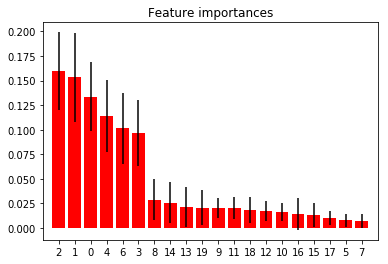

In [244]:
plt.figure()
plt.title("Feature importances")
plt.bar(range(X_train.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(X_train.shape[1]), indices)
plt.xlim([-1, X_train.shape[1]])
plt.show()

In [245]:
actual_values = y_test.values.argmax(axis=1)
predictions = clf2.predict(X_test).argmax(axis=1)

accuracy_score = accuracy_score(actual_values, predictions)
accuracy_score

0.977304469273743

In [246]:
balanced_accuracy_score = balanced_accuracy_score(actual_values, predictions)
balanced_accuracy_score

0.9771686292776032

In [247]:
precision = pd.DataFrame(precision_score(actual_values, predictions,average=None))
recall = pd.DataFrame(recall_score(actual_values, predictions,average=None))
f1_score = pd.DataFrame(f1_score(actual_values, predictions, average=None))

precision_recall = pd.concat([precision, recall, f1_score], axis=1)
precision_recall.columns = ['precision', 'recall', 'f1_score']
precision_recall.index = ['Cena', 'Ducha', 'Lavadora', 'Aspiradora', 'Afeitadora', 'Secador_pelo', 
                          'Aire_acondicionado', 'Telefono', 'Tecleo', 'Silencio', 'Secadora', 'Timbre', 
                          'Licuadora', 'Alarma', 'Grifo', 'Microondas']
precision_recall.index.name = 'momento_aux'
precision_recall

,precision,recall,f1_score
momento_aux,,,
Cena,0.746667,1.000000,0.854962
Ducha,0.994709,1.000000,0.997347
Lavadora,1.000000,0.994413,0.997199
Aspiradora,0.980000,0.954545,0.967105
Afeitadora,1.000000,0.952756,0.975806
Secador_pelo,0.989691,0.974619,0.982097
Aire_acondicionado,1.000000,0.958084,0.978593
Telefono,1.000000,0.991031,0.995495
Tecleo,1.000000,0.921569,0.959184


Confusion matrix, without normalization
[[168   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0 188   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0 178   1   0   0   0   0   0   0   0   0   0   0   0   0]
 [  6   0   0 147   0   0   0   0   0   0   0   0   0   0   1   0]
 [  6   0   0   0 121   0   0   0   0   0   0   0   0   0   0   0]
 [  5   0   0   0   0 192   0   0   0   0   0   0   0   0   0   0]
 [  5   0   0   0   0   2 160   0   0   0   0   0   0   0   0   0]
 [  1   1   0   0   0   0   0 221   0   0   0   0   0   0   0   0]
 [ 13   0   0   2   0   0   0   0 188   1   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0 166   0   0   0   0   0   0]
 [  1   0   0   0   0   0   0   0   0   0 186   0   0   0   0   0]
 [  5   0   0   0   0   0   0   0   0   0   0 190   0   0   0   0]
 [  1   0   0   0   0   0   0   0   0   0   0   0 212   0   0   0]
 [  3   0   0   0   0   0   0   0   0   0   0   0   0 190   0   0]
 [  1   0   0   0   0 

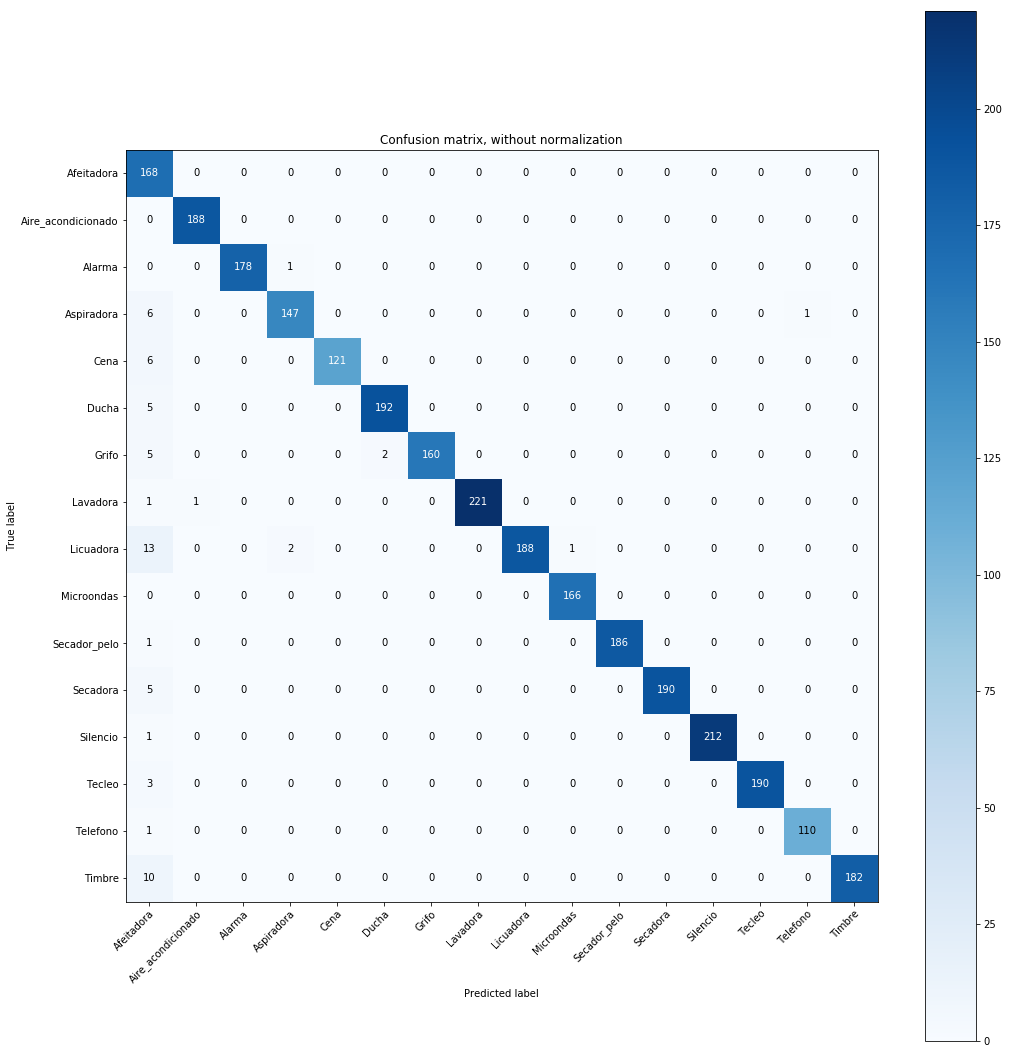

In [248]:
def plot_confusion_matrix(y_true, y_pred, classes, normalize=False, title=None, cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    classes = classes[unique_labels(y_true, y_pred)]
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    fig, ax = plt.subplots(figsize=(15,15))
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax

plot_confusion_matrix(actual_values, predictions, y.columns)

In [249]:
y = label_binarize(y, classes=['Cena', 'Ducha', 'Lavadora', 'Aspiradora', 'Afeitadora', 'Secador_pelo', 
                               'Aire_acondicionado', 'Telefono', 'Tecleo', 'Silencio', 'Secadora', 'Timbre', 
                               'Licuadora', 'Alarma', 'Grifo', 'Microondas'])
n_classes = y.shape[1]

In [250]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True)

In [251]:
classifier = OneVsRestClassifier(RandomForestClassifier(n_estimators=40))
y_score = classifier.fit(X_train, y_train).predict_proba(X_test)

In [252]:
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

In [253]:
fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

In [254]:
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

In [255]:
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += interp(all_fpr, fpr[i], tpr[i])

In [256]:
mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

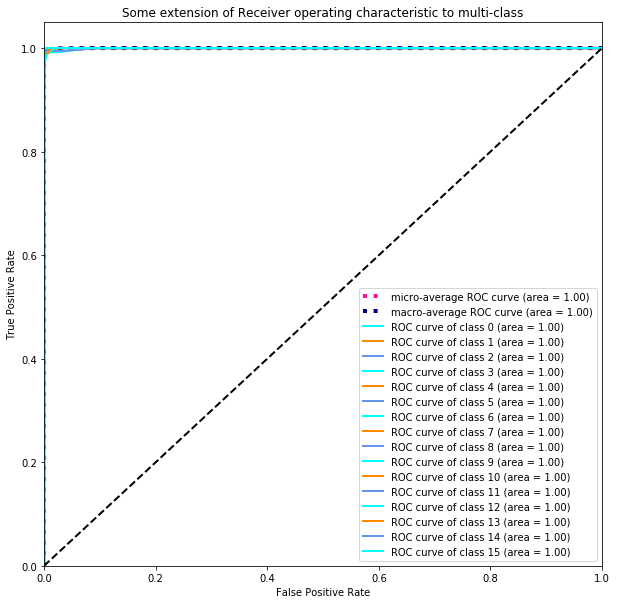

In [257]:
plt.figure(figsize=(10,10))
lw = 2
plt.plot(fpr["micro"], tpr["micro"],
         label='micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["micro"]),
         color='deeppink', linestyle=':', linewidth=4)

plt.plot(fpr["macro"], tpr["macro"],
         label='macro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["macro"]),
         color='navy', linestyle=':', linewidth=4)

colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Some extension of Receiver operating characteristic to multi-class')
plt.legend(loc="lower right")
plt.show()

# PCA - 8

In [258]:
%matplotlib inline

import numpy as np
import pandas as pd
import pandas.io

import matplotlib.pyplot as plt

import librosa.display
import librosa

from glob import glob

import ffmpeg

import os

from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsRestClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import linear_model
from sklearn.metrics import accuracy_score
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

from scipy import interp

from itertools import cycle

import seaborn as sns

import pickle

In [259]:
def readCsvToDataFrame(path):
    theDataFrame= pd.read_csv(path)
    theDataFrame = theDataFrame.drop(['Fourier33', 'Fourier34', 'Fourier35', 'Fourier36', 'Fourier37', 'Fourier38', 
                                      'Fourier39', 'Fourier40', 'Fourier41', 'Fourier42', 'Fourier43', 'Fourier44', 
                                      'Fourier45', 'Fourier46', 'Fourier47', 'Fourier48', 'Fourier49', 'Fourier50', 
                                      'Fourier51', 'Fourier52', 'Fourier53', 'Fourier54', 'Fourier55', 'Fourier56', 
                                      'Fourier57', 'Fourier58', 'Fourier59', 'Fourier60', 'Fourier61', 'Fourier62', 
                                      'Fourier63', 'Fourier64'], axis=1)
    return theDataFrame

data = readCsvToDataFrame('data_fourier_64.csv')

In [260]:
features = ['mfcc', 'scem','scom', 'srom','sbwm', 'tempo', 'rmse', 
            'Fourier1', 'Fourier2', 'Fourier3', 'Fourier4', 'Fourier5', 
            'Fourier6', 'Fourier7', 'Fourier8', 'Fourier9', 'Fourier10',
            'Fourier11', 'Fourier12', 'Fourier13', 'Fourier14', 'Fourier15',
            'Fourier16', 'Fourier17', 'Fourier18', 'Fourier19', 'Fourier20',
            'Fourier21', 'Fourier22', 'Fourier23', 'Fourier24', 'Fourier25',
            'Fourier26', 'Fourier27', 'Fourier28', 'Fourier29', 'Fourier30',
            'Fourier31', 'Fourier32']

x = data.loc[:, features].values
y = data.loc[:,['momento']].values

x = StandardScaler().fit_transform(x)

In [261]:
pca = PCA(n_components=8)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents, 
                           columns = ['principal component 1',
                                      'principal component 2',
                                      'principal component 3',
                                      'principal component 4',
                                      'principal component 5',
                                      'principal component 6',
                                      'principal component 7',
                                      'principal component 8'])

principalDf.head()

,principal component 1,principal component 2,principal component 3,principal component 4,principal component 5,principal component 6,principal component 7,principal component 8
0,-3.142309,-0.751721,-1.004814,-1.192590,-0.372791,1.701751,-0.246475,-0.055195
1,-0.767639,1.543034,-0.094952,-0.325111,0.486940,0.371904,0.369002,-0.887091
2,-0.341089,-3.507823,1.735128,0.300611,-1.706293,-1.095905,-0.467797,-1.478016
3,5.626618,1.379284,-0.963308,0.818895,0.793383,0.114609,-0.804097,0.807150
4,-0.558670,-2.629421,1.194813,0.332668,-0.854587,-0.549852,0.409169,0.522542


In [262]:
principalDf.reset_index(drop=True, inplace=True)

aux = data[['momento']]
aux.reset_index(drop=True, inplace=True)

finalDf = pd.concat([principalDf, aux], axis = 1)
finalDf.head()

,principal component 1,principal component 2,principal component 3,principal component 4,principal component 5,principal component 6,principal component 7,principal component 8,momento
0,-3.142309,-0.751721,-1.004814,-1.192590,-0.372791,1.701751,-0.246475,-0.055195,Timbre
1,-0.767639,1.543034,-0.094952,-0.325111,0.486940,0.371904,0.369002,-0.887091,Cena
2,-0.341089,-3.507823,1.735128,0.300611,-1.706293,-1.095905,-0.467797,-1.478016,Lavadora
3,5.626618,1.379284,-0.963308,0.818895,0.793383,0.114609,-0.804097,0.807150,Secador_pelo
4,-0.558670,-2.629421,1.194813,0.332668,-0.854587,-0.549852,0.409169,0.522542,Aire_acondicionado


In [263]:
print('La variación explicada por cada feature ha sido de {} respectivamente.'.format(pca.explained_variance_ratio_))
print('La variación explicada total de este modelo con respecto al original ha sido del {:.2f}%.'.format(np.sum(pca.explained_variance_ratio_)*100))
print('La variación perdida con respecto al modelo original ha sido del {:.2f}%.'.format(100 - np.sum(pca.explained_variance_ratio_)*100))

La variación explicada por cada feature ha sido de [0.36004416 0.13829704 0.06264158 0.04445052 0.0389488  0.02974773
 0.02658342 0.02401547] respectivamente.
La variación explicada total de este modelo con respecto al original ha sido del 72.47%.
La variación perdida con respecto al modelo original ha sido del 27.53%.


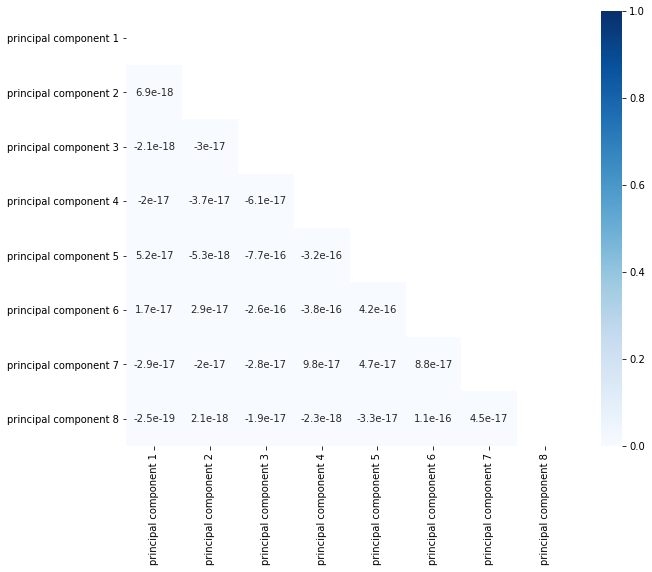

In [264]:
def get_matrix(dataset, classes):
    mask = np.zeros_like(dataset.corr(), dtype=np.bool)
    mask[np.triu_indices_from(mask)] = True
    fig, ax = plt.subplots(figsize=(10,8))
    ax = sns.heatmap(dataset.corr(), mask=mask, annot=True, cmap="Blues")

#     sns.set(style="ticks")
#     sns.pairplot(dataset, hue=classes)
    
get_matrix(finalDf, 'momento')

In [265]:
y = pd.get_dummies(data=finalDf.momento)
X = data.loc[:, finalDf.columns != 'momento']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True)

In [266]:
clf3 = OneVsRestClassifier(RandomForestClassifier(n_estimators=60))
scores = cross_val_score(clf3, X, y, cv=20)
print(scores)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

[0.98603352 0.98882682 0.98044693 0.98743017 0.99441341 0.99301676
 0.98463687 0.99441341 0.97765363 0.98463687 0.99441341 0.99022346
 0.98463687 0.98882682 0.98044693 0.98324022 0.98324022 0.98881119
 0.98741259 0.98041958]
Accuracy: 0.99 (+/- 0.01)


In [270]:
clf3.fit(X_train, y_train)
clf3.score(X_test, y_test)

0.9828910614525139

In [271]:
predictions = clf3.predict(X_test)
errors = abs(predictions - y_test)
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')

Mean Absolute Error: Afeitadora            0.0
Aire_acondicionado    0.0
Alarma                0.0
Aspiradora            0.0
Cena                  0.0
Ducha                 0.0
Grifo                 0.0
Lavadora              0.0
Licuadora             0.0
Microondas            0.0
Secador_pelo          0.0
Secadora              0.0
Silencio              0.0
Tecleo                0.0
Telefono              0.0
Timbre                0.0
dtype: float64 degrees.


In [272]:
cls = RandomForestClassifier(n_estimators=40, random_state=0)
cls.fit(X_train, y_train)
importances = cls.feature_importances_

In [273]:
std = np.std([tree.feature_importances_ for tree in cls.estimators_], axis=0)

In [274]:
indices = np.argsort(importances)[::-1]

In [275]:
print("Feature ranking:")

for f in range(X_train.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

display(pd.DataFrame(cls.feature_importances_, 
                     index = X_train.columns, 
                     columns = ['importance']).sort_values('importance', ascending=False))

Feature ranking:
1. feature 2 (0.190522)
2. feature 1 (0.168081)
3. feature 0 (0.164754)
4. feature 6 (0.155756)
5. feature 4 (0.153605)
6. feature 3 (0.136293)
7. feature 7 (0.015941)
8. feature 5 (0.015046)


,importance
scom,0.190522
scem,0.168081
mfcc,0.164754
rmse,0.155756
sbwm,0.153605
srom,0.136293
Fourier1,0.015941
tempo,0.015046


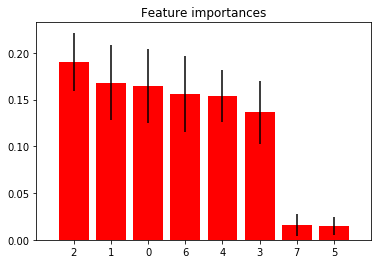

In [276]:
plt.figure()
plt.title("Feature importances")
plt.bar(range(X_train.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(X_train.shape[1]), indices)
plt.xlim([-1, X_train.shape[1]])
plt.show()

In [277]:
actual_values = y_test.values.argmax(axis=1)
predictions = clf3.predict(X_test).argmax(axis=1)

accuracy_score = accuracy_score(actual_values, predictions)
accuracy_score

0.9832402234636871

In [278]:
balanced_accuracy_score = balanced_accuracy_score(actual_values, predictions)
balanced_accuracy_score

0.9830313818456617

In [279]:
precision = pd.DataFrame(precision_score(actual_values, predictions,average=None))
recall = pd.DataFrame(recall_score(actual_values, predictions,average=None))
f1_score = pd.DataFrame(f1_score(actual_values, predictions, average=None))

precision_recall = pd.concat([precision, recall, f1_score], axis=1)
precision_recall.columns = ['precision', 'recall', 'f1_score']
precision_recall.index = ['Cena', 'Ducha', 'Lavadora', 'Aspiradora', 'Afeitadora', 'Secador_pelo', 
                          'Aire_acondicionado', 'Telefono', 'Tecleo', 'Silencio', 'Secadora', 'Timbre', 
                          'Licuadora', 'Alarma', 'Grifo', 'Microondas']
precision_recall.index.name = 'momento_aux'
precision_recall

,precision,recall,f1_score
momento_aux,,,
Cena,0.801762,1.000000,0.889976
Ducha,1.000000,0.994681,0.997333
Lavadora,1.000000,0.978723,0.989247
Aspiradora,1.000000,0.942857,0.970588
Afeitadora,1.000000,0.977099,0.988417
Secador_pelo,1.000000,0.988636,0.994286
Aire_acondicionado,1.000000,0.982955,0.991404
Telefono,1.000000,0.992063,0.996016
Tecleo,1.000000,0.954082,0.976501


Confusion matrix, without normalization
[[182   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  1 187   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  3   0 184   0   0   0   0   0   0   0   0   0   0   0   1   0]
 [  9   0   0 165   0   0   0   0   0   0   0   0   0   0   1   0]
 [  3   0   0   0 128   0   0   0   0   0   0   0   0   0   0   0]
 [  2   0   0   0   0 174   0   0   0   0   0   0   0   0   0   0]
 [  3   0   0   0   0   0 173   0   0   0   0   0   0   0   0   0]
 [  2   0   0   0   0   0   0 250   0   0   0   0   0   0   0   0]
 [  9   0   0   0   0   0   0   0 187   0   0   0   0   0   0   0]
 [  1   0   0   0   0   0   0   0   0 184   0   0   0   0   0   0]
 [  2   0   0   0   0   0   0   0   0   0 167   0   0   0   0   0]
 [  2   0   0   0   0   0   0   0   0   0   0 182   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0 181   0   0   0]
 [  1   0   0   0   0   0   0   0   0   0   0   0   0 183   0   0]
 [  1   0   0   0   0 

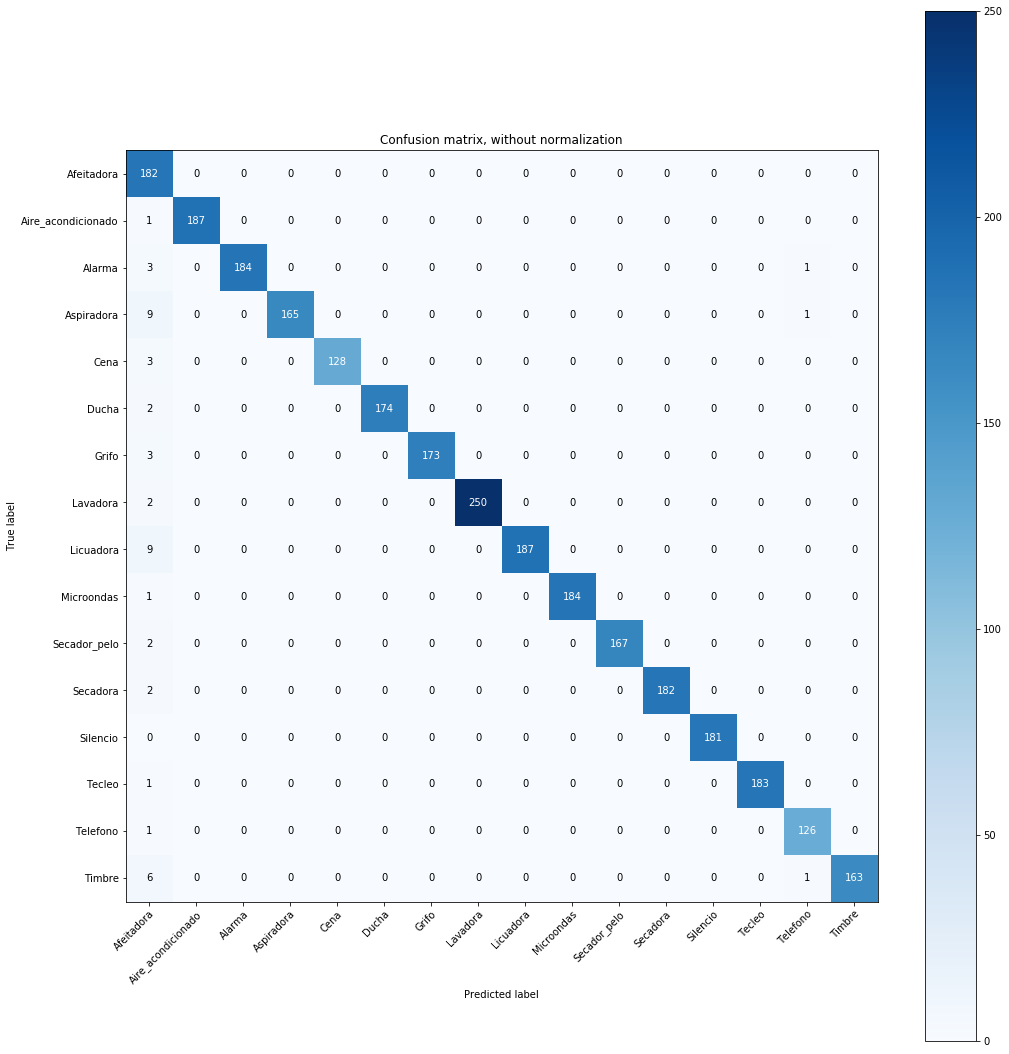

In [280]:
def plot_confusion_matrix(y_true, y_pred, classes, normalize=False, title=None, cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    classes = classes[unique_labels(y_true, y_pred)]
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    fig, ax = plt.subplots(figsize=(15,15))
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax

plot_confusion_matrix(actual_values, predictions, y.columns)

In [281]:
y = label_binarize(y, classes=['Cena', 'Ducha', 'Lavadora', 'Aspiradora', 'Afeitadora', 'Secador_pelo', 
                               'Aire_acondicionado', 'Telefono', 'Tecleo', 'Silencio', 'Secadora', 'Timbre', 
                               'Licuadora', 'Alarma', 'Grifo', 'Microondas'])
n_classes = y.shape[1]

In [282]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True)

In [283]:
classifier = OneVsRestClassifier(RandomForestClassifier(n_estimators=40))
y_score = classifier.fit(X_train, y_train).predict_proba(X_test)

In [284]:
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

In [285]:
fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

In [286]:
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

In [287]:
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += interp(all_fpr, fpr[i], tpr[i])

In [288]:
mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

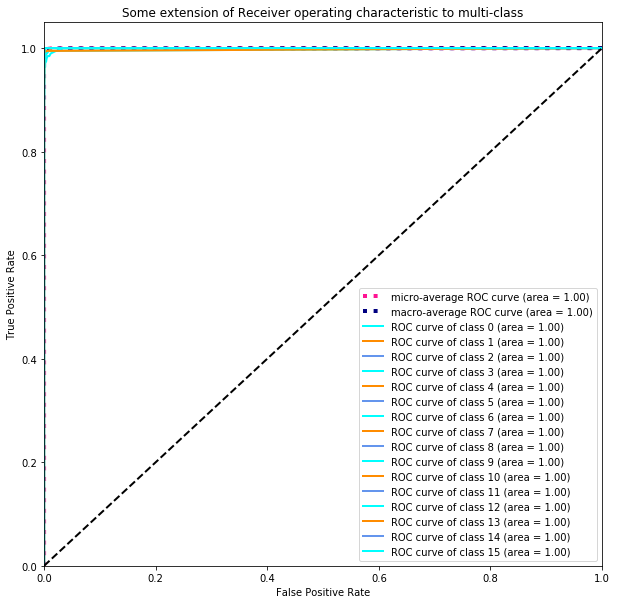

In [289]:
plt.figure(figsize=(10,10))
lw = 2
plt.plot(fpr["micro"], tpr["micro"],
         label='micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["micro"]),
         color='deeppink', linestyle=':', linewidth=4)

plt.plot(fpr["macro"], tpr["macro"],
         label='macro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["macro"]),
         color='navy', linestyle=':', linewidth=4)

colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Some extension of Receiver operating characteristic to multi-class')
plt.legend(loc="lower right")
plt.show()

# Conclusiones

Como se ha podido observar en los diferentes resultados, tras aplicar los diferentes PCA no ha habido una mejora sustancial en la calidad de la regresión, los resultados han pasado de una precisión del 96% al 98% en el mejor de los casos.

Además habría que tener en cuenta la aleatoriedad a la hora de seleccionar el train set y test set. 

A pesar de esto, a la hora de hacer las predicciones voy a aplicar el modelo de PCA con 20 features, ya que aunque el score sea prácticamente el mismo, cabría la posibilidad de que las predicciones fuesen mejores.